In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
train_dir = "cell_images/train"
test_dir = "cell_images/test"

In [15]:
uninfected_images = [img for img in os.listdir(f'{test_dir}/Uninfected')]
parasitized_images = [img for img in os.listdir(f'{test_dir}/Parasitized')]

In [16]:
#Visualizing the images
import matplotlib.image as mpimg
import random
def visualize_image(directory,cell_class):
    folder = directory + cell_class
    
    #get a random image from the folder
    random_img = random.sample(os.listdir(folder),4)
    
#     print(len(random_img))
    plt.figure(figsize=(12,12))
    #plot the random image
    for i in range(len(random_img)):
        plt.subplot(2,2,i+1)
        img = mpimg.imread(folder + "/" + random_img[i])
        plt.imshow(img)
        plt.title(cell_class,fontsize=20)
        plt.xlabel(f"Image shape: {img.shape}",fontsize=20) #show the shape of the image
    

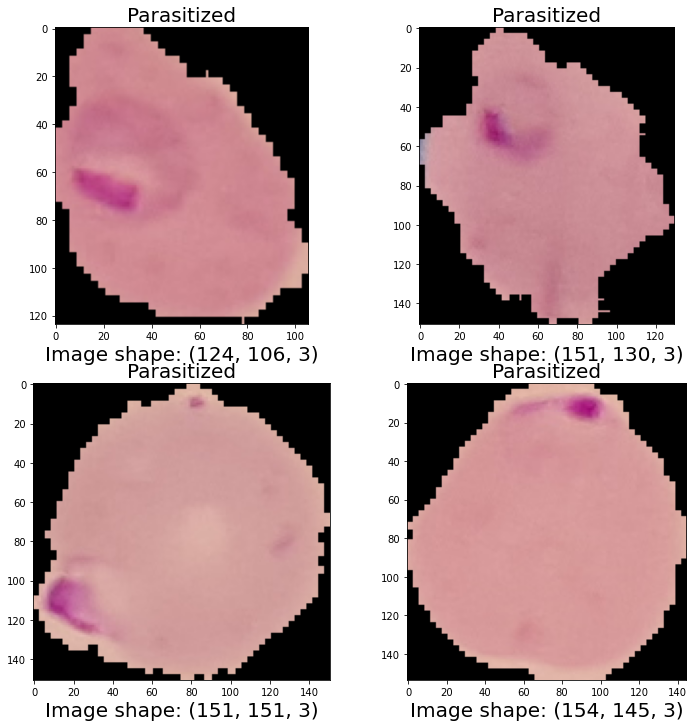

In [17]:
img = visualize_image(directory="cell_images/test/",cell_class="Parasitized")

In [18]:
# making n X m matrix
import time
start = time.time()
from tensorflow.keras.preprocessing import image
def img2np(path, list_of_filename, size = (64, 64)):
    # iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size = size, 
                                       color_mode = 'grayscale')
        # covert image to a matrix
        img_ts = image.img_to_array(current_image)
        # turn that into a vector / 1D array
        img_ts = [img_ts.ravel()]
        try:
            # concatenate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError: 
            # if not assigned yet, assign one
            full_mat = img_ts
    return full_mat

end = time.time()
print(end-start)

0.0


In [19]:
start = time.time()
# run it on our folders
uninfected_images = img2np(f'{test_dir}/Uninfected/', uninfected_images)
parasitized_images = img2np(f'{test_dir}/Parasitized/', parasitized_images)
end=time.time()
print(end-start)

73.74359035491943


In [22]:
uninfected_images.shape

(2756, 4096)

In [25]:
def find_mean_img(full_mat, title, size = (64, 64)):
    # calculate the average
    mean_img = np.mean(full_mat, axis = 0)
    # reshape it back to a matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

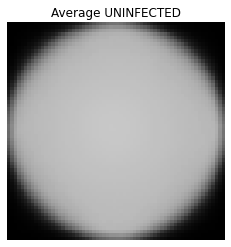

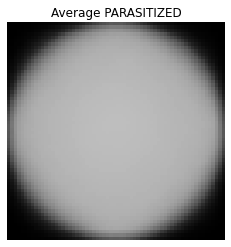

0.384047269821167


In [26]:
start = time.time()
uninfected_mean = find_mean_img(uninfected_images, 'UNINFECTED')
parasitized_mean = find_mean_img(parasitized_images, 'PARASITIZED')
end=time.time()
print(end-start)

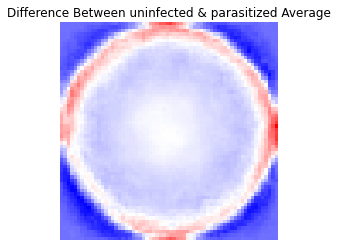

In [27]:
#contrast mean
contrast_mean = uninfected_mean - parasitized_mean
plt.imshow(contrast_mean, cmap='bwr')
plt.title(f'Difference Between uninfected & parasitized Average')
plt.axis('off')
plt.show()

In [1]:
# import zipfile
# zip_file = zipfile.ZipFile("Malaria.zip")
# zip_file.extractall()
# zip_file.close()

In [2]:
# #making testing and training dataset
# import shutil
# rootdir= 'C:/Users/saksh/Desktop/Malaria project/cell_images' #path of the original folder
# for i in class_names:
#     os.makedirs(rootdir +'/train/' + i)
#     os.makedirs(rootdir +'/test/' + i)
#     source = rootdir + '/' + i
#     FileNames = os.listdir(source)
#     np.random.shuffle(FileNames)
#     test_ratio = 0.20
#     train_Files, test_Files = np.split(np.array(FileNames),[int(len(FileNames)* (1 - test_ratio))])
   
#     train_Files = [source+'/'+ name for name in train_Files.tolist()]
#     test_Files = [source+'/' + name for name in test_Files.tolist()]
    
#     for name in train_Files:
#         shutil.copy(name, rootdir +'/train/' + i)

#     for name in test_Files:
#         shutil.copy(name, rootdir +'/test/' + i)

In [3]:
# #delete Parasitized and uninfected folders
# shutil.rmtree('C:/Users/saksh/Desktop/Malaria project/cell_images/Parasitized')
# shutil.rmtree('C:/Users/saksh/Desktop/Malaria project/cell_images/Uninfected')